# Alucar - Analisando as vendas

In [160]:
import pandas as pd

In [161]:
pd.read_csv('dados/alucar.csv').head() # importando a base de dados

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [162]:
alucar= pd.read_csv('dados/alucar.csv')

In [163]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [164]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [165]:
print('Quatidade de dados nulos', alucar.isna().sum().sum())

Quatidade de dados nulos 0


In [166]:
alucar.dtypes # retorna o tipo dos dados do DataFrame

mes       object
vendas     int64
dtype: object

In [167]:
# Converter o mes de object para data
alucar['mes'] =pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [168]:
!pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [169]:
print(sns.__version__)

0.11.0


<AxesSubplot:xlabel='mes', ylabel='vendas'>

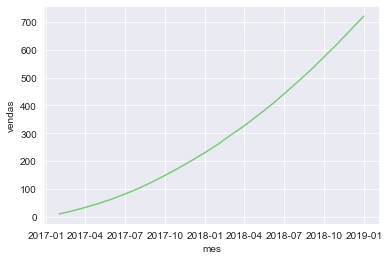

In [170]:
# As contas estão aumentando ou diminuindo? -> criando um gráfico de linha (x=parametro x, y=parametro y, data=DataFrame)
sns.lineplot(x='mes',y='vendas', data=alucar)

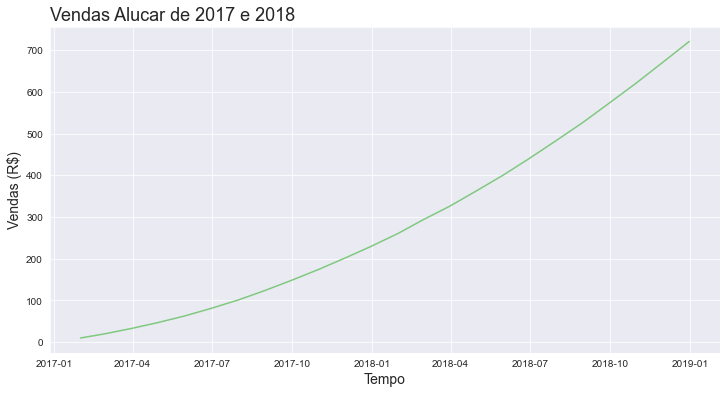

In [171]:
sns.set_palette('Accent') # setando uma paleta de cor diferente
sns.set_style('darkgrid') # Colocar um grid
ax = sns.lineplot(x='mes',y='vendas', data=alucar)
ax.figure.set_size_inches(12,6) # Aumentando o tamanho do gráfico
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18) # colocando um título no gráfico
ax.set_xlabel('Tempo', fontsize=14) # alterando as labels
ax.set_ylabel('Vendas (R$)', fontsize=14) # alterando as labels
ax= ax
# time series -> coleções de observações feitas em um intervalo de tempo

In [172]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [173]:
# pegar o mes n+1 e subtrair com o mes n -> retorna a diferença na tabela de vendas
alucar['aumento'] = alucar['vendas'].diff() 
alucar.head

<bound method NDFrame.head of           mes  vendas  aumento
0  2017-01-31      10      NaN
1  2017-02-28      20     10.0
2  2017-03-31      33     13.0
3  2017-04-30      47     14.0
4  2017-05-31      63     16.0
5  2017-06-30      81     18.0
6  2017-07-31     101     20.0
7  2017-08-31     124     23.0
8  2017-09-30     148     24.0
9  2017-10-31     174     26.0
10 2017-11-30     201     27.0
11 2017-12-31     230     29.0
12 2018-01-31     261     31.0
13 2018-02-28     293     32.0
14 2018-03-31     326     33.0
15 2018-04-30     362     36.0
16 2018-05-31     400     38.0
17 2018-06-30     440     40.0
18 2018-07-31     483     43.0
19 2018-08-31     527     44.0
20 2018-09-30     573     46.0
21 2018-10-31     621     48.0
22 2018-11-30     670     49.0
23 2018-12-31     721     51.0>

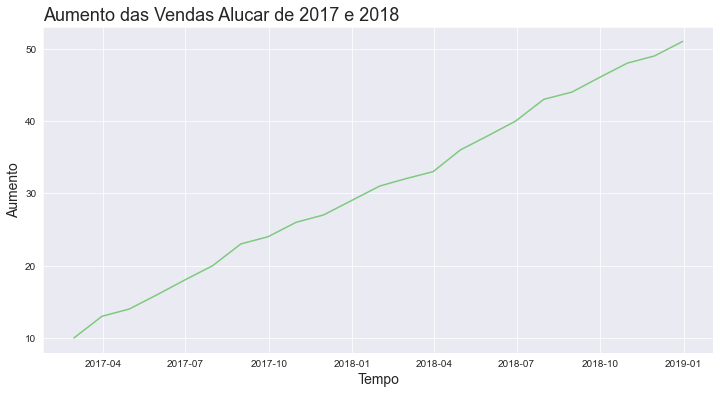

In [174]:
sns.set_palette('Accent') # setando uma paleta de cor diferente
sns.set_style('darkgrid') # Colocar um grid
ax = sns.lineplot(x='mes',y='aumento', data=alucar)
ax.figure.set_size_inches(12,6) # Aumentando o tamanho do gráfico
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc='left', fontsize=18) # colocando um título no gráfico
ax.set_xlabel('Tempo', fontsize=14) # alterando as labels
ax.set_ylabel('Aumento', fontsize=14) # alterando as labels
ax= ax
# time series -> coleções de observações feitas em um intervalo de tempo

In [175]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent') # setando uma paleta de cor diferente
    sns.set_style('darkgrid') # Colocar um grid
    ax = sns.lineplot(x=x ,y=y, data=dataset)
    ax.figure.set_size_inches(12,6) # Aumentando o tamanho do gráfico
    ax.set_title(titulo, loc='left', fontsize=18) # colocando um título no gráfico
    ax.set_xlabel(labelx, fontsize=14) # alterando as labels
    ax.set_ylabel(labely, fontsize=14) # alterando as labels
    ax= ax

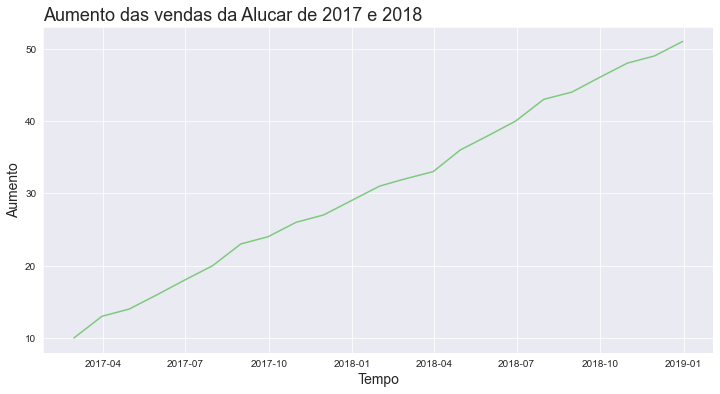

In [176]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', # O titulo do grafico
       'Tempo', # Oque escrito no eixo x
       'Aumento', # OQue esta escrito no eixo y
       'mes', # Qual o parametro do eixo x
       'aumento', # Qual o parametro do eixo y
       alucar # O dataframe que veio a informacao
      )

In [177]:
# Qual a aceleração que esse aumento esta tendo?
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


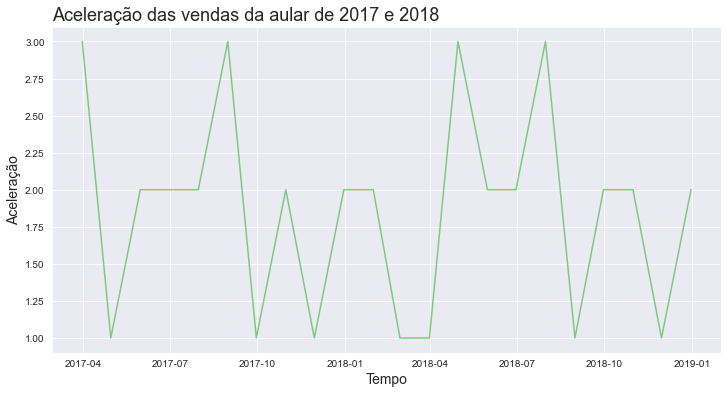

In [178]:
plotar('Aceleração das vendas da aular de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

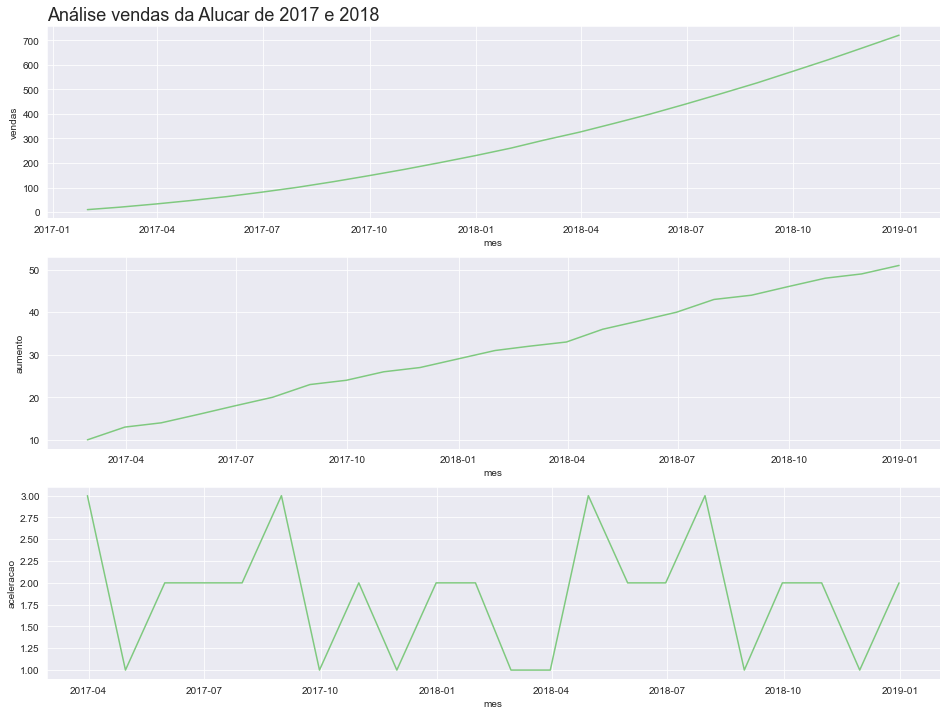

In [179]:
# Plotando os 3 gráficos ao mesmo tempo
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1) #plt(numero de divisoes, ocupe todo o espaço, quero que esteja na primeira parte)
ax.set_title('Análise vendas da Alucar de 2017 e 2018', fontsize=18, loc='left') # cria um titulo
sns.lineplot(x='mes',y='vendas', data=alucar) 
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao', data=alucar)
ax=ax

In [180]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1) #plt(numero de divisoes, ocupe todo o espaço, quero que esteja na primeira parte)
    ax.set_title(titulo, fontsize=18, loc='left') # cria um titulo
    sns.lineplot(x=x,y=y1, data=dataset) 
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3, data=dataset)
    ax=ax

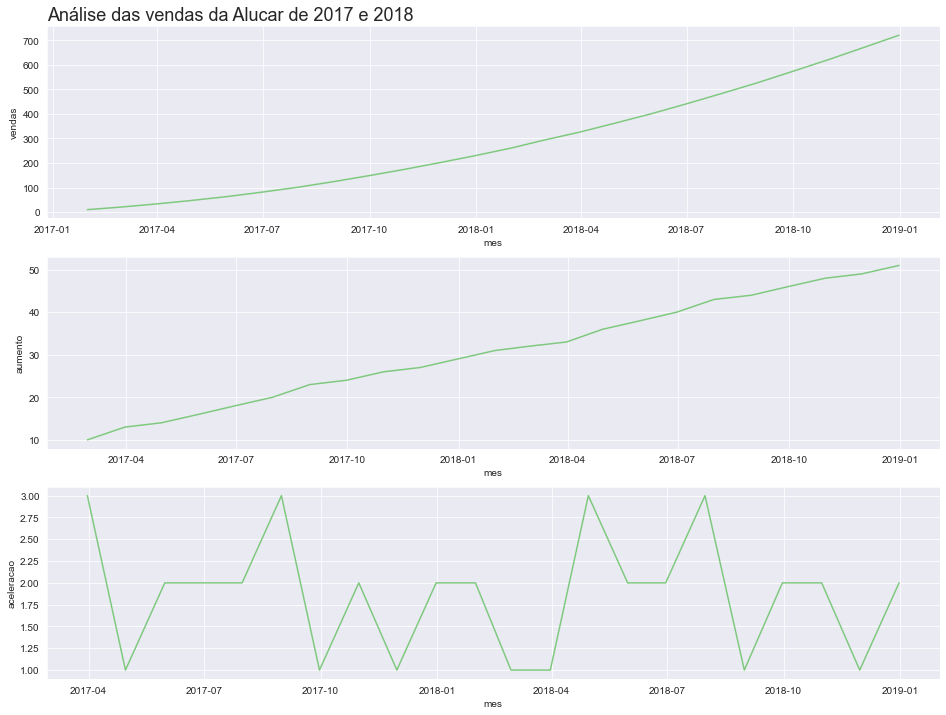

In [181]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar de 2017 e 2018')

In [182]:
from pandas.plotting import autocorrelation_plot

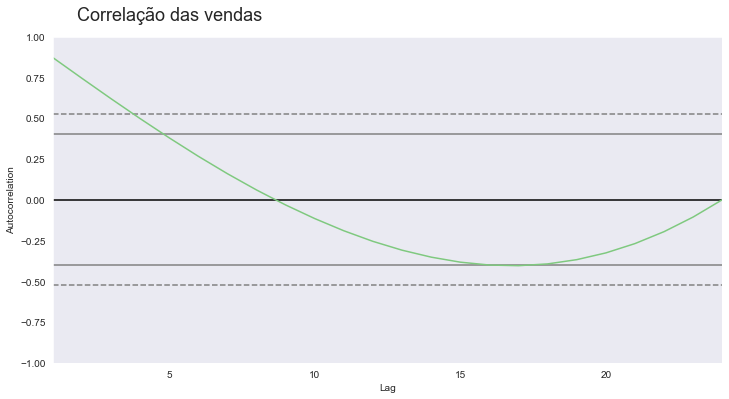

In [183]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

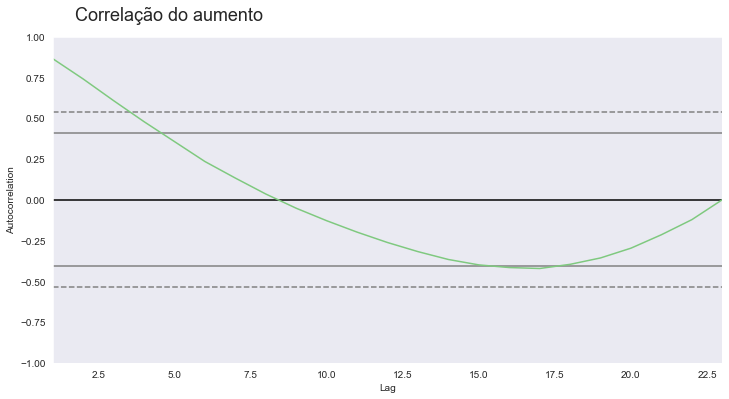

In [184]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:]) # pq começa no índice 1
ax=ax 

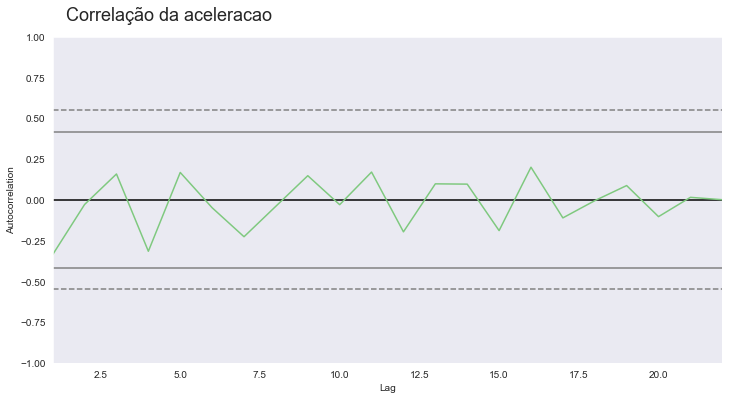

In [185]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:]) # pq começa no índice 2
ax=ax 

# Alucar analisando assinantes da newsletter

In [186]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [187]:
# Descobrindo se o número de assinantes tem crescido ou diminuido
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [188]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos 0


In [189]:
# Alterando o assinantes mes de object para datetime
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [190]:
# Descobrindo o aumento
assinantes['aumento'] = assinantes['assinantes'].diff() # Faz o diff para descobrir o aumento
assinantes['aceleracao'] = assinantes['aumento'].diff() # Faz o diff para descobrir a aceleracao
assinantes.head()


,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


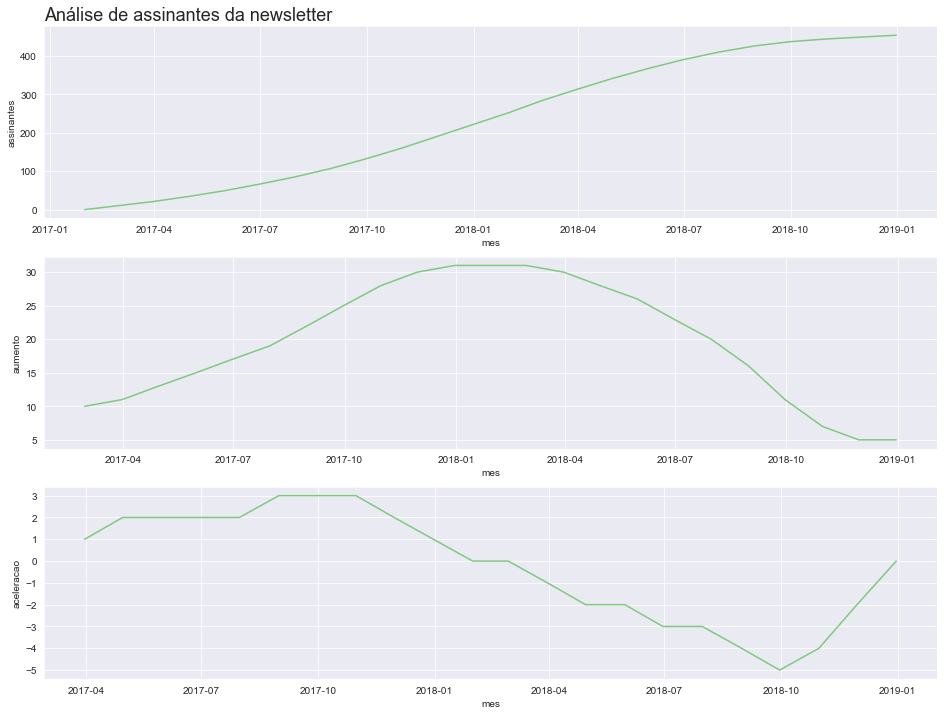

In [191]:
# plotando
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [192]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [193]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [194]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [195]:
print('Quantidades de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidades de linhas: (24, 2)
Quantidade de dados nulos: 0


In [196]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


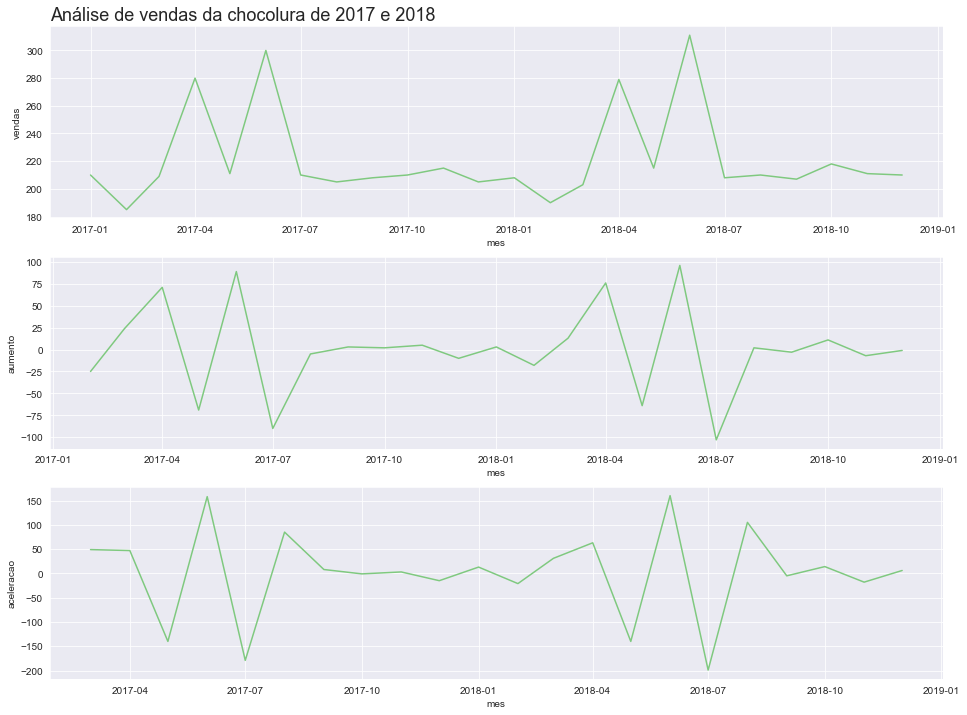

In [197]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da chocolura de 2017 e 2018')

# Chocolura - Vendas diárias(Outubro e Novembro)

In [198]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [199]:
print('Quantidade de linhas e colunas', vendas_por_dia.shape)
print('Quantidade de dados nulos', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas (61, 2)
Quantidade de dados nulos 0


In [200]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [201]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [202]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


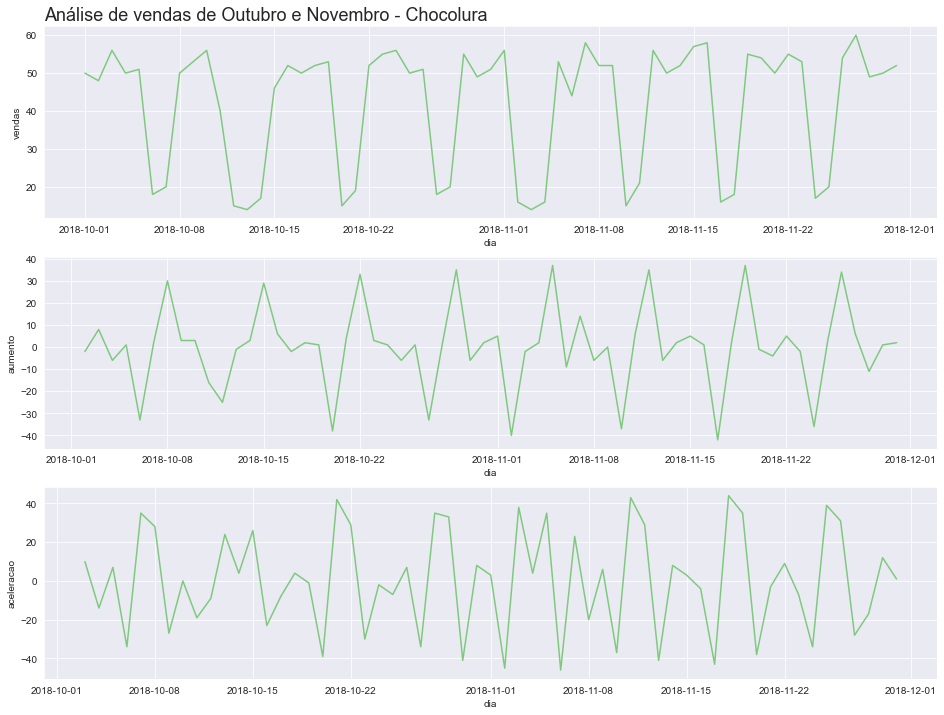

In [203]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

**Analizando a sazonalidade**

In [204]:
# Criando uma coluna nova e colocando os dias da semana
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()

In [205]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [206]:
# Mudando os dados para portugues
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [207]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta',
                   'Saturday':'Sabado','Sunday':'Domingo'}

In [208]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [209]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


** Agrupando os dia**


In [210]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round() # groupby(quem eu quero que seja agrupado)[oq eu quero que seja agrupado].media.arrendondadas

<ipython-input-210-10e9e66ed8ee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round() # groupby(quem eu quero que seja agrupado)[oq eu quero que seja agrupado].media.arrendondadas


In [211]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


# **Correlação das vendas diárias**

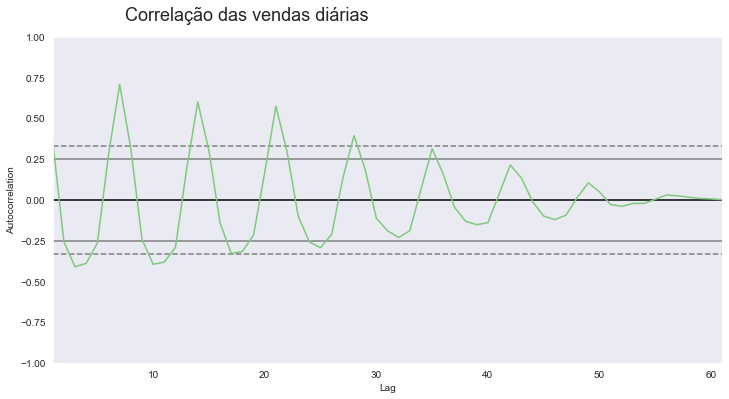

In [212]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

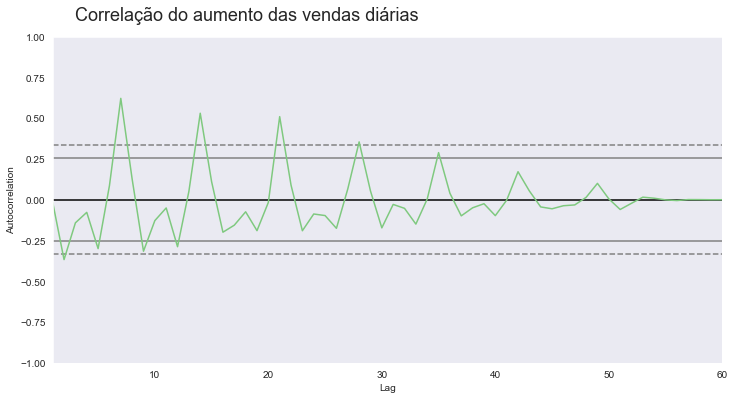

In [213]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

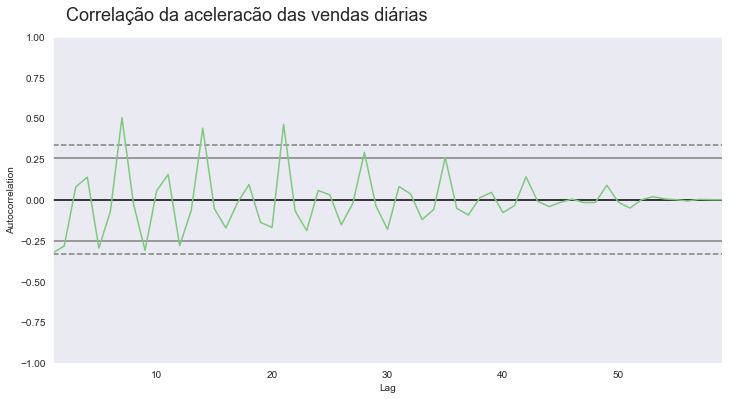

In [214]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracão das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

# Cafelura - Análise de vendas

In [215]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [216]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [217]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [218]:
print('Quantidade de linhas e colunas', cafelura.shape)
print('Quantidade de dados nulos', cafelura.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


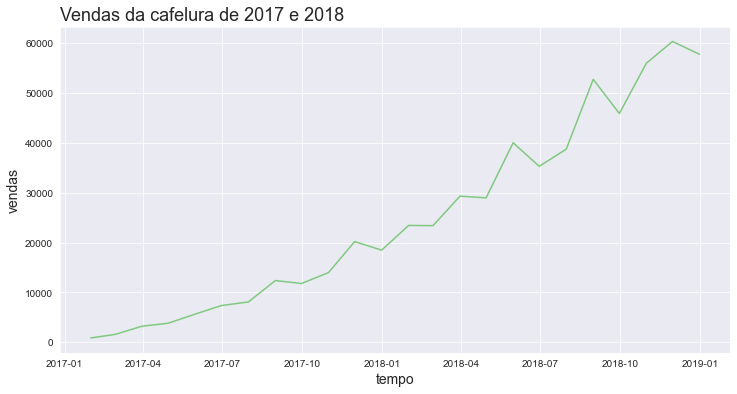

In [219]:
plotar('Vendas da cafelura de 2017 e 2018', 'tempo', 'vendas', 'mes', 'vendas', cafelura)

In [220]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [221]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [222]:
cafelura['vendas_normalizadas']= cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


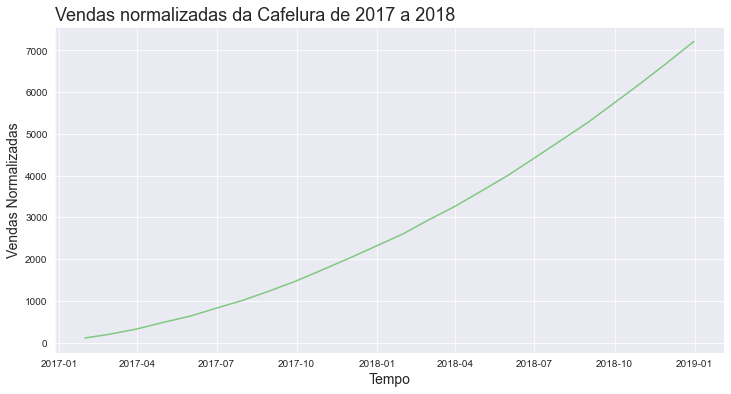

In [223]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

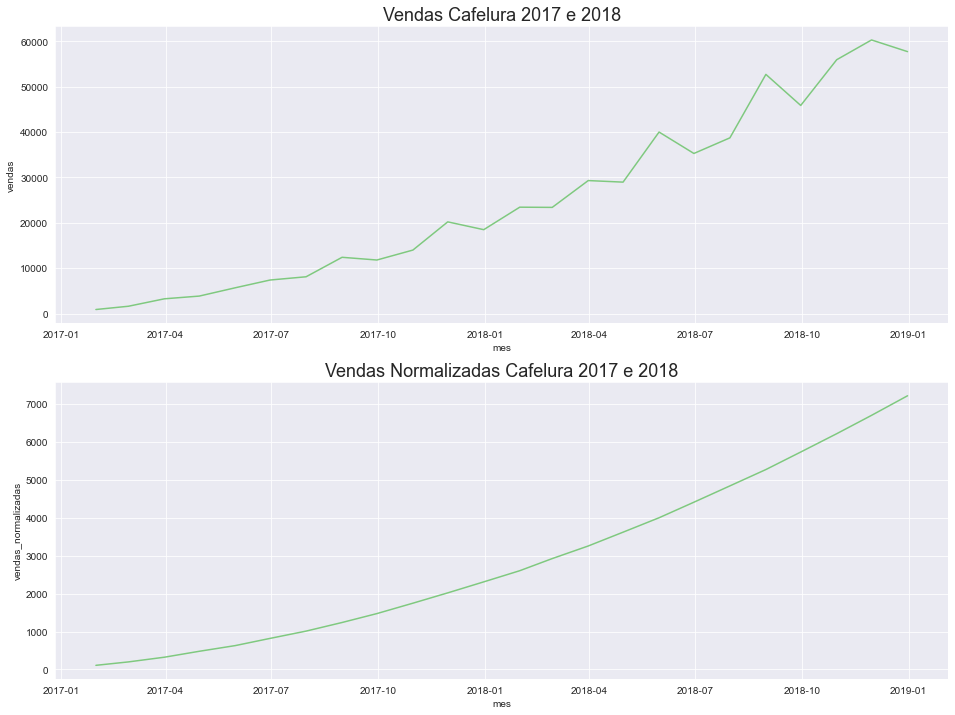

In [224]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

# Statsmodels

In [225]:
from statsmodels.tsa.seasonal import seasonal_decompose

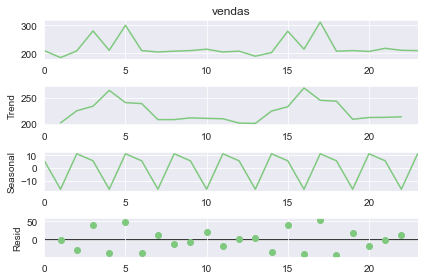

In [226]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

In [227]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [228]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


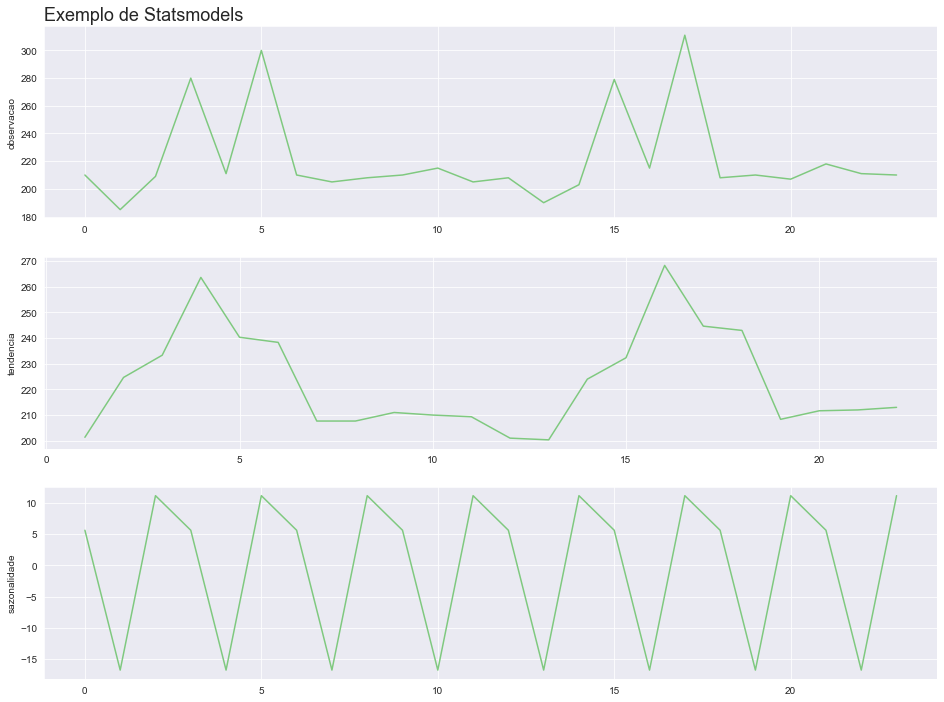

In [229]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [230]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [231]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [232]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [233]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quandidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quandidade de dados nulos: 0


In [234]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


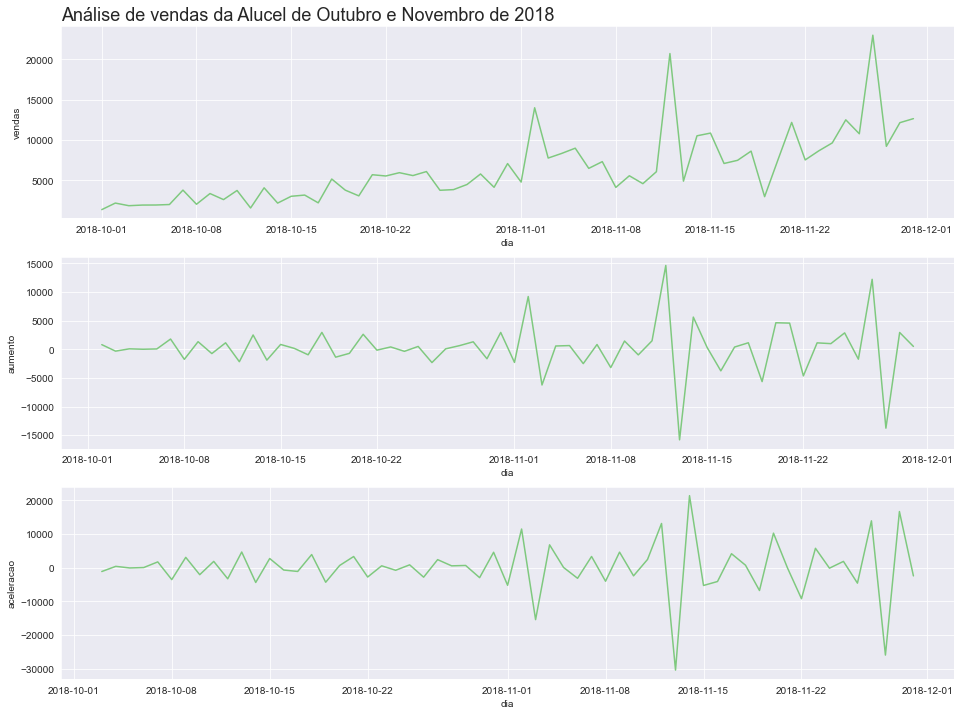

In [235]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 
                'Análise de vendas da Alucel de Outubro e Novembro de 2018')

## Técnica da média móvel

In [236]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [238]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


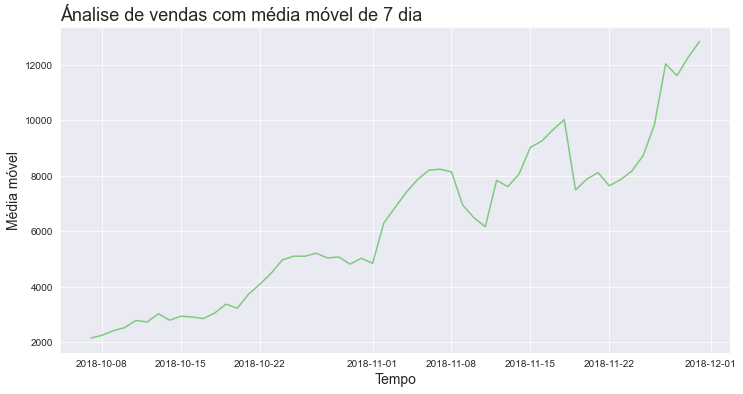

In [239]:
plotar('Ánalise de vendas com média móvel de 7 dia', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

In [240]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

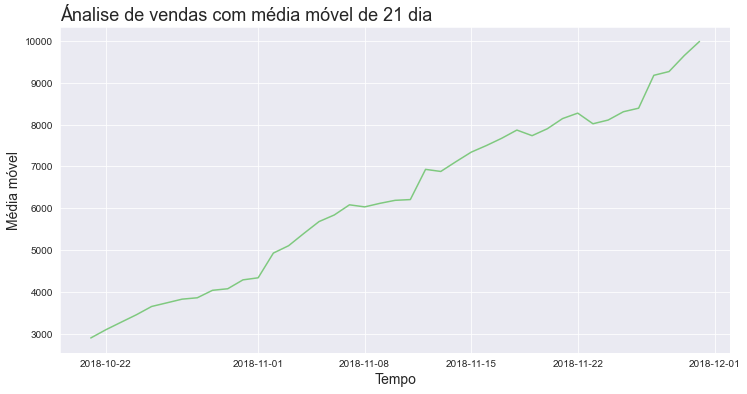

In [241]:
plotar('Ánalise de vendas com média móvel de 21 dia', 'Tempo', 'Média móvel', 'dia', 'media_movel_21', alucel)

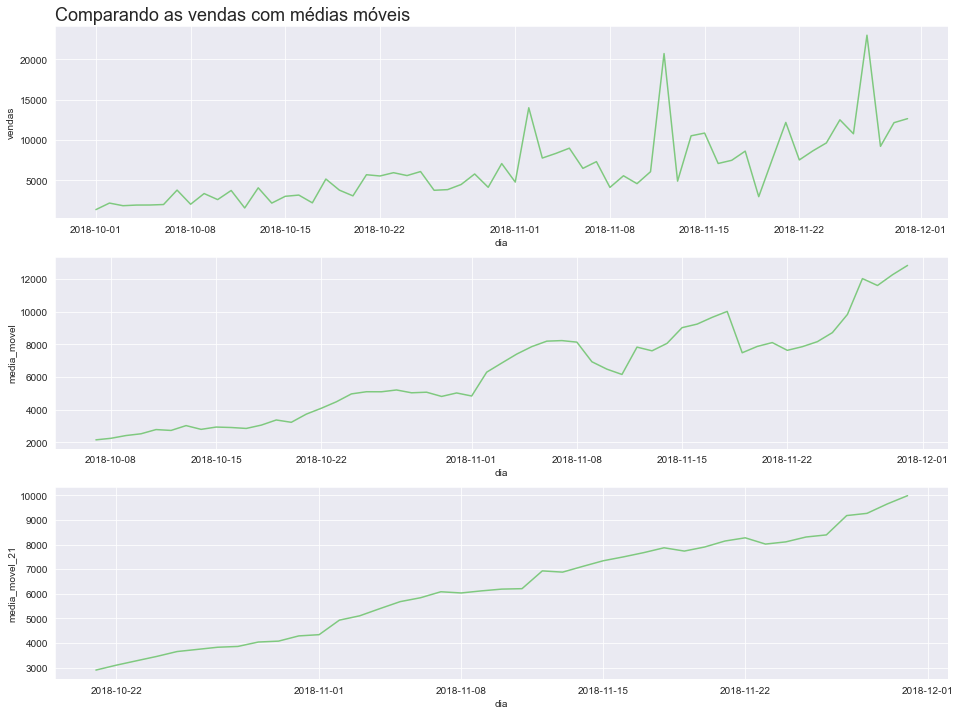

In [242]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',alucel, 'Comparando as vendas com médias móveis')